In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.ndimage as ndimage
import time
from tqdm import tqdm

import itertools

In [2]:
%matplotlib notebook

In [3]:
class DiffMatrix():
    
    def __init__(self,
                size= 300,
                diffusion_characteristics = 'default'):
#       Reaction caracteristics
        if diffusion_characteristics == 'default':
            self.diff_a = 1
            self.diff_b = 0.5
            self.feed_rate = 0.055
            self.kill_rate = 0.062
            self.timestep = 1
            self.laplace_window = 3
        
        # use two dimentions 0 for A, 1 for B
        self.size = size
        self.matrix_shape = (2, size, size)

        self.mat = np.ones(self.matrix_shape)
        self.mat[1] = 0
        
        start_b = int(0.45 * size)
        end_b = int(0.55 * size)
        self.mat[1][start_b:end_b,start_b:end_b] = 1
        self.next = np.zeros(self.matrix_shape)
        self.next[0] = 1
    
    def mat_blocker_fill_random(self):
        self.mat[1] = np.random.rand(self.size,self.size)
        
    def _update(self):
        
        for x, y in itertools.product(range(self.matrix_shape[1]),range(self.matrix_shape[2])):
#             print(x,y)
            a = self.mat[0][x][y]
            b = self.mat[1][x][y]
        
            reaction = a*b*b
            diffusion_a = self.diff_a * self.laplaceA(x,y)
            feed_a = self.feed_rate * (1 - a)            
            diffusion_b = self.diff_b * self.laplaceB(x,y)
            feed_b = (self.kill_rate + self.feed_rate) * b
        
            a_new = a + (diffusion_a - reaction + feed_a) * self.timestep
            b_new = b + (diffusion_b + reaction - feed_b) * self.timestep
            
#             print(f'{a} + {(self.diff_a * self.laplaceA(x,y) * a)} -{(a*b*b)} + {(self.feed_rate * (1-a))} * {self.timestep}')
#             print(f'\ta:{a} new :{a_new}')
#             print(f'\tb:{b} new :{b_new}')
#             print(f'{b} + {(self.diff_b * self.laplaceB(x,y) * b)} + {(a*b*b)} - {(self.kill_rate + self.feed_rate) * b} * {self.timestep}')
            
#             if a_new > np.float64(1):
#                 a_new = np.float64(1)
#             if b_new > np.float64(1):
#                 b_new = np.float64(1)
            
            self.next[0][x][y] = a_new
            self.next[1][x][y] = b_new
        
        self.switch()
    
    def switch(self):
        self.mat = self.next.copy()
    
    def laplaceA(self,x,y):
        return self.lap_filter(self.mat[0],x,y)
    
    def laplaceB(self,x,y):
        return self.lap_filter(self.mat[1],x,y)
    
    def lap_filter(self,mat, x, y):
        
        #prevent overflow error
        right_target = 0 if x == self.size -1 else x + 1
        bottom_target = 0 if y == self.size -1 else y + 1
        
        filter_total = mat[x][y] * -1

        # cross:
        filter_total += mat[x][y-1] * 0.2
        filter_total += mat[x][bottom_target] * 0.2
        filter_total += mat[right_target][y] * 0.2
        filter_total += mat[x-1][y] * 0.2

        #diag
        filter_total += mat[x-1][bottom_target] * 0.05
        filter_total += mat[x-1][y-1] * 0.05
        filter_total += mat[right_target][bottom_target] * 0.05
        filter_total += mat[right_target][y-1] * 0.05
        
        return filter_total


In [4]:
def plot_matrixes(dm):
    fig, axes = plt.subplots(nrows=1, ncols=2, sharex=True)
#     axes[0].set_title('Activator')


In [5]:
def plthm(mat,i):
    axes[0].imshow(dm.mat[0], cmap='binary', interpolation='nearest',vmin=0, vmax=1)
    axes[0].set_title(f'Activator at {i}')
    axes[1].set_title(f'Blocker at {i}')
    axes[1].imshow(dm.mat[1], cmap='binary', interpolation='nearest',vmin=0, vmax=1)
    plt.show()
    fig.canvas.draw()


In [26]:
dm = DiffMatrix(size = 100)
# dm.mat_blocker_fill_random()

In [27]:
# fig,axes = plt.subplots(1,2)
# axes[0].set_title('Activator')
# axes[1].set_title('Blocker')
# plt.legend()

# p_bar = tqdm(range(10000))
# for p in tqdm(range(100)):
# print_every_n = 10

# for i in range(11):
#     dm._update()
#     if i % print_every_n == 0:
#         print(i)
#         print(f"Mean a: {dm.mat[0].mean()}Mean b:{dm.mat[1].mean()}")
#         print(f"Max a: {dm.mat[0].max()}Max b:{dm.mat[1].max()}")
        
#     p_bar.set_description(f"Ma: {dm.mat[0].mean()}Mb:{dm.mat[1].mean()}")

    
# p_bar2 = tqdm(range(10))      
# for p in p_bar2:         
    
#     dm._update()
#     p_bar2.set_description(f"Ma: {dm.mat[0].mean()}  Mb:{dm.mat[1].mean()}")

#     time.sleep(0.1)
# print(dm.mat[0].mean())
# print(dm.mat[1].mean())


<IPython.core.display.Javascript object>


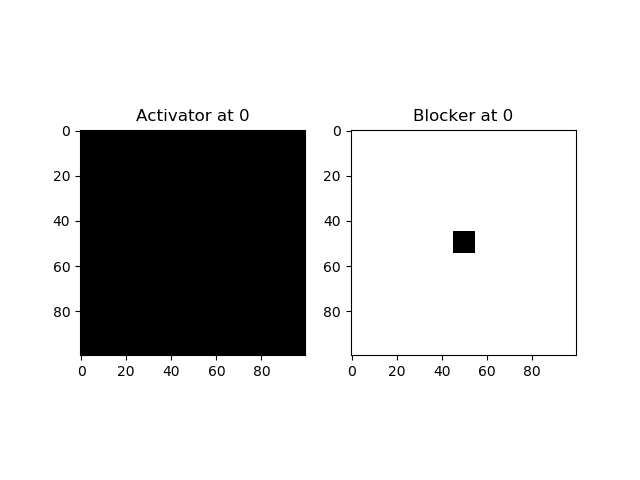

In [28]:
fig,axes = plt.subplots(1,2)
axes[0].set_title('Activator')
axes[1].set_title('Blocker')
plthm(dm.mat, 0)

In [29]:
print(f"Ma: {dm.mat[0].mean()}Mb:{dm.mat[1].mean()}")
print(f"Ma: {dm.mat[0].max()}Mb:{dm.mat[1].max()}")

Ma: 1.0Mb:0.01
Ma: 1.0Mb:1.0


<IPython.core.display.Javascript object>


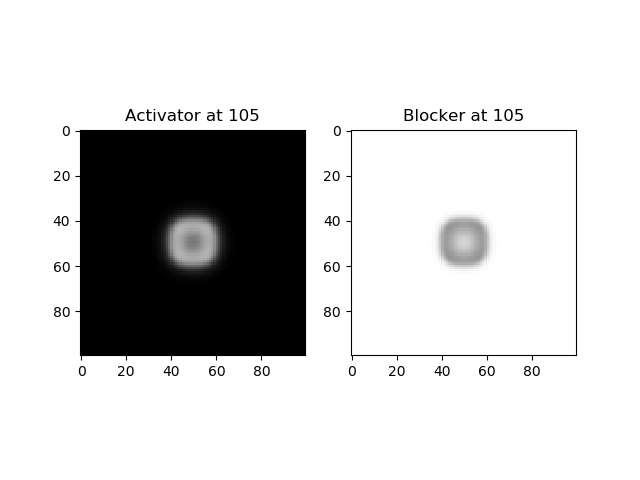

  1%|          | 1/110 [00:00<00:35,  3.10it/s]

0
Mean a: 0.9899999999999998Mean b:0.01883
Max a: 0.9999999999999999Max b:1.883


  5%|▌         | 6/110 [00:01<00:32,  3.18it/s]

5
Mean a: 0.9873873898419561Mean b:0.014638777076885415
Max a: 0.9999999999999998Max b:1.3824161996972566


 10%|█         | 11/110 [00:03<00:25,  3.96it/s]

10
Mean a: 0.9830986550875567Mean b:0.014412221644987124
Max a: 0.9999999999999998Max b:0.9023284733314075


 15%|█▍        | 16/110 [00:04<00:23,  4.06it/s]

15
Mean a: 0.9802163828311059Mean b:0.013947715890960492
Max a: 0.9999999999999998Max b:0.720710722090063


 19%|█▉        | 21/110 [00:05<00:23,  3.86it/s]

20
Mean a: 0.9784061394904098Mean b:0.013391464457434535
Max a: 0.9999999999999998Max b:0.605753400886711


 24%|██▎       | 26/110 [00:06<00:22,  3.75it/s]

25
Mean a: 0.9771281968697806Mean b:0.0130186030542689
Max a: 0.9999999999999998Max b:0.5311253460006895


 28%|██▊       | 31/110 [00:08<00:21,  3.69it/s]

30
Mean a: 0.9762048014429984Mean b:0.012784089032364065
Max a: 0.9999999999999998Max b:0.4962018765456324


 33%|███▎      | 36/110 [00:09<00:19,  3.78it/s]

35
Mean a: 0.9755194477229696Mean b:0.01264953245953206
Max a: 0.9999999999999998Max b:0.47207660492086156


 37%|███▋      | 41/110 [00:10<00:18,  3.79it/s]

40
Mean a: 0.9749882928265697Mean b:0.012590805875936861
Max a: 0.9999999999999998Max b:0.45173931789622335


 42%|████▏     | 46/110 [00:11<00:17,  3.72it/s]

45
Mean a: 0.9745514372028571Mean b:0.012592086992251166
Max a: 0.9999999999999998Max b:0.4369357889101571


 46%|████▋     | 51/110 [00:12<00:16,  3.55it/s]

50
Mean a: 0.9741659457398044Mean b:0.012642947208273386
Max a: 0.9999999999999998Max b:0.42606244360836676


 51%|█████     | 56/110 [00:14<00:14,  3.62it/s]

55
Mean a: 0.9738013897488806Mean b:0.012736083822732405
Max a: 0.9999999999999998Max b:0.4184426741412131


 55%|█████▌    | 61/110 [00:15<00:14,  3.49it/s]

60
Mean a: 0.9734369459642117Mean b:0.0128657055567904
Max a: 0.9999999999999998Max b:0.41444420113229324


 59%|█████▉    | 65/110 [00:16<00:10,  4.17it/s]

65
Mean a: 0.9730594169446726Mean b:0.013026487681359512
Max a: 0.9999999999999998Max b:0.4133401076278238


 65%|██████▍   | 71/110 [00:18<00:11,  3.36it/s]

70
Mean a: 0.9726617782198733Mean b:0.013212980355961176
Max a: 0.9999999999999998Max b:0.4130778035677196


 68%|██████▊   | 75/110 [00:19<00:08,  4.30it/s]

75
Mean a: 0.9722419714268606Mean b:0.013419393376510654
Max a: 0.9999999999999998Max b:0.4132793983396616


 73%|███████▎  | 80/110 [00:20<00:07,  4.06it/s]

80
Mean a: 0.9718017583841644Mean b:0.013639691977874187
Max a: 0.9999999999999998Max b:0.41360728832313964


 77%|███████▋  | 85/110 [00:22<00:08,  3.12it/s]

85
Mean a: 0.9713455549103739Mean b:0.013867916371999271
Max a: 0.9999999999999998Max b:0.4137880246782631


 82%|████████▏ | 90/110 [00:23<00:06,  3.26it/s]

90
Mean a: 0.9708792632147702Mean b:0.014098607181082324
Max a: 0.9999999999999998Max b:0.4136272230177272


 86%|████████▋ | 95/110 [00:25<00:04,  3.23it/s]

95
Mean a: 0.9704091918295901Mean b:0.01432720790042918
Max a: 0.9999999999999998Max b:0.41301311368849986


 91%|█████████ | 100/110 [00:27<00:02,  3.90it/s]

100
Mean a: 0.9699411720498669Mean b:0.01455033918181986
Max a: 0.9999999999999998Max b:0.41274939494863727


 95%|█████████▌| 105/110 [00:28<00:01,  4.07it/s]

105
Mean a: 0.969479950352211Mean b:0.014765891834273709
Max a: 0.9999999999999998Max b:0.4133659614577676


100%|██████████| 110/110 [00:30<00:00,  4.00it/s]


In [30]:
print_every_n = 5
fig,axes = plt.subplots(1,2)

for i in tqdm(range(110)):
    dm._update()
    if i % print_every_n == 0:
        print(i)
        print(f"Mean a: {dm.mat[0].mean()}Mean b:{dm.mat[1].mean()}")
        print(f"Max a: {dm.mat[0].max()}Max b:{dm.mat[1].max()}")
        plthm(dm.mat, i) 

In [40]:
dm = DiffMatrix(5)
# dm.fill_matrix_propper()
dm.mat[1][2][2] = 1

In [41]:
dm.mat[1]

array([[0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 1., 0., 0.],
       [0., 0., 0., 0., 0.],
       [0., 0., 0., 0., 0.]])

In [42]:
dm.mat[0]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [43]:
dm._update()

In [44]:
dm.mat[0]

array([[1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 0., 1., 1.],
       [1., 1., 1., 1., 1.],
       [1., 1., 1., 1., 1.]])

In [45]:
dm.mat[1]

array([[0.   , 0.   , 0.   , 0.   , 0.   ],
       [0.   , 0.025, 0.1  , 0.025, 0.   ],
       [0.   , 0.1  , 1.383, 0.1  , 0.   ],
       [0.   , 0.025, 0.1  , 0.025, 0.   ],
       [0.   , 0.   , 0.   , 0.   , 0.   ]])